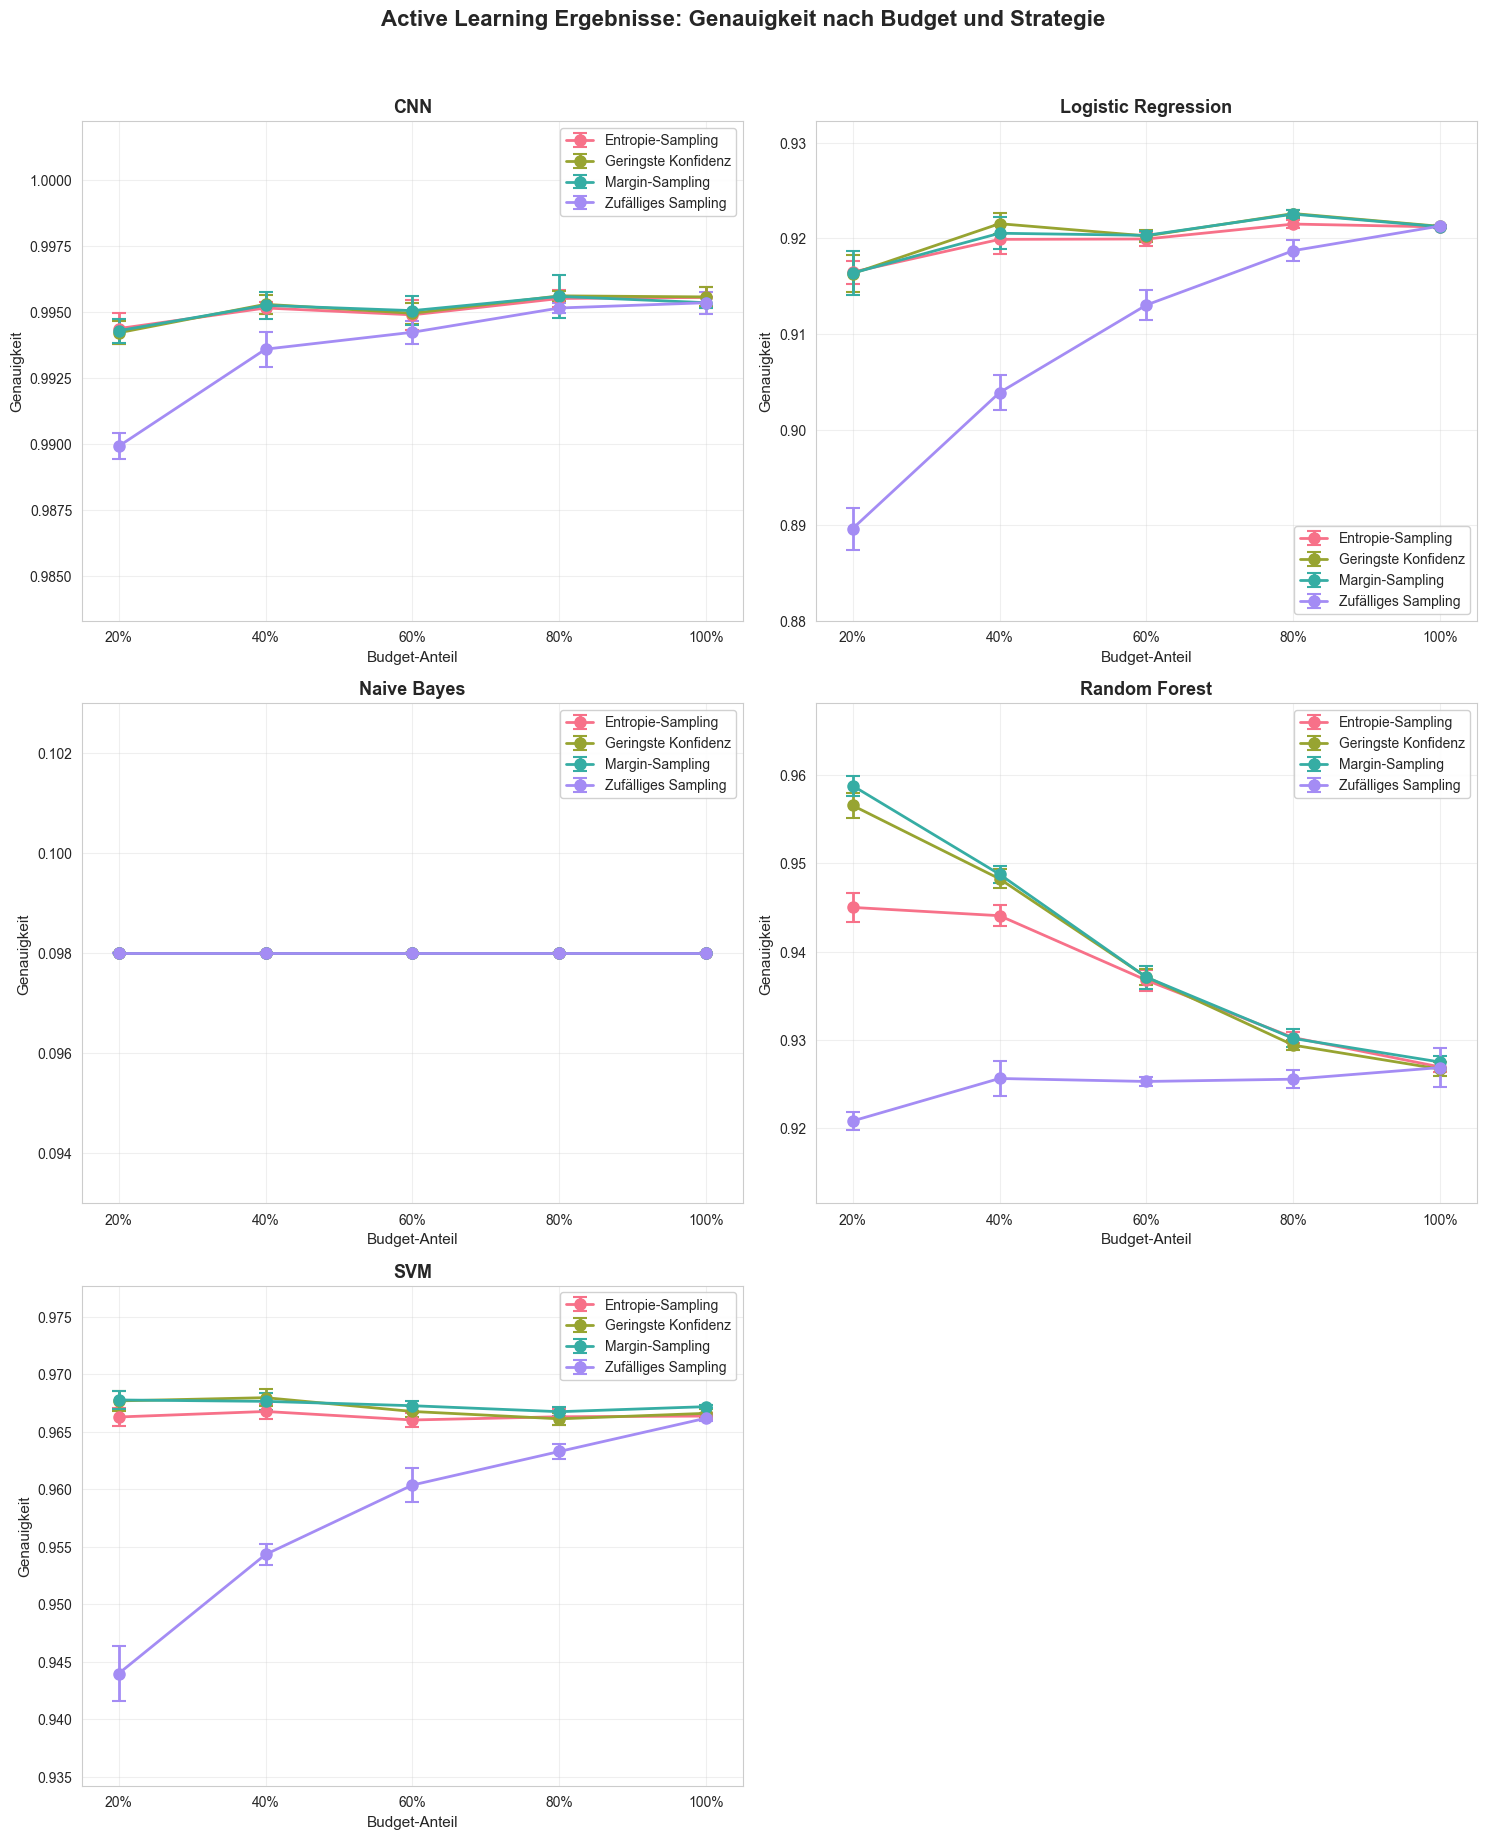

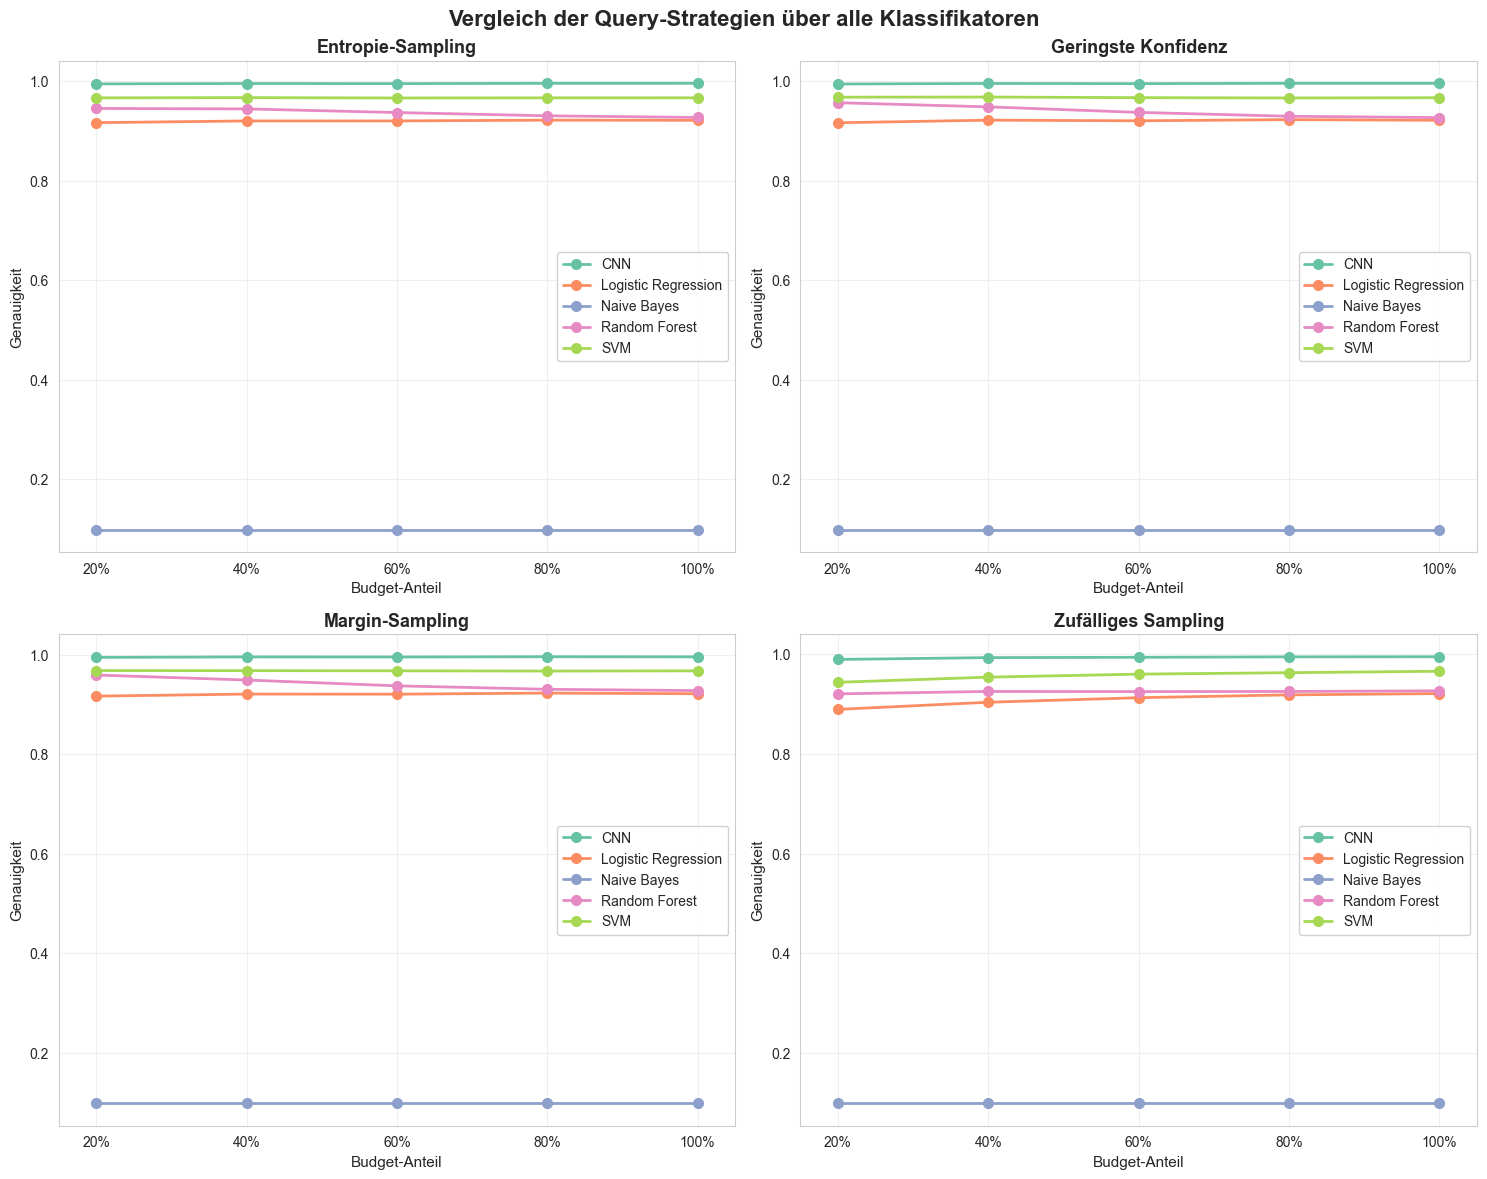

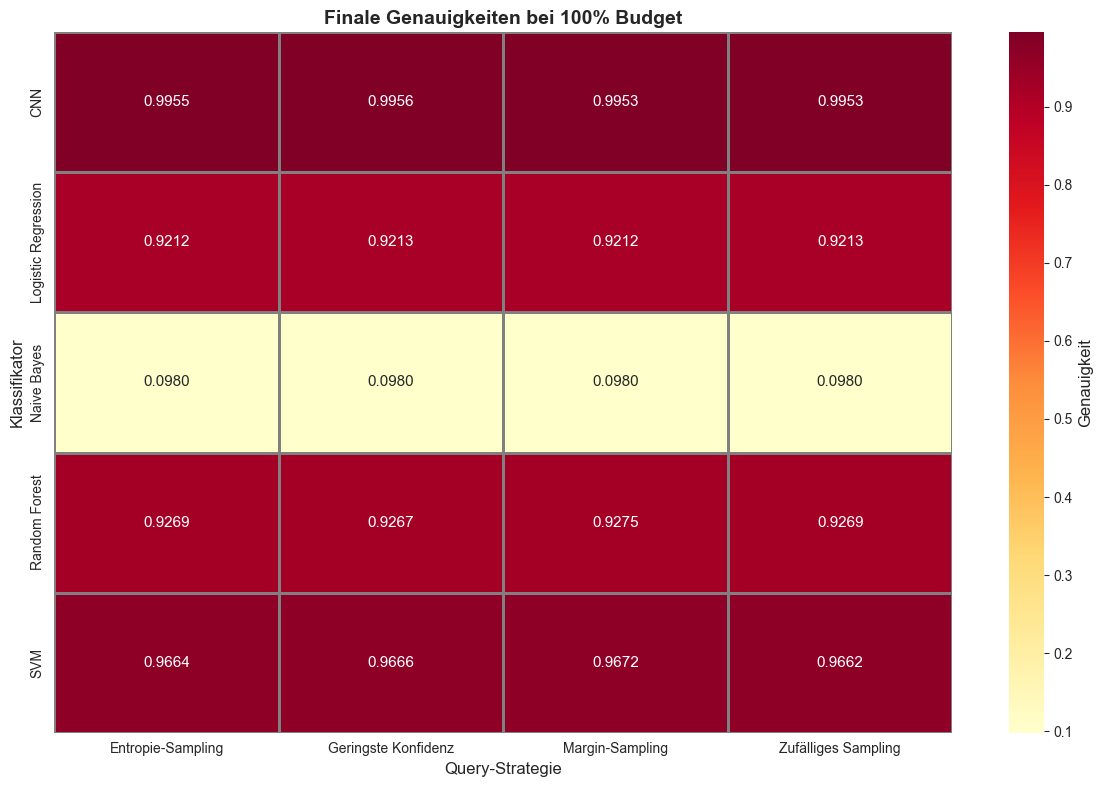

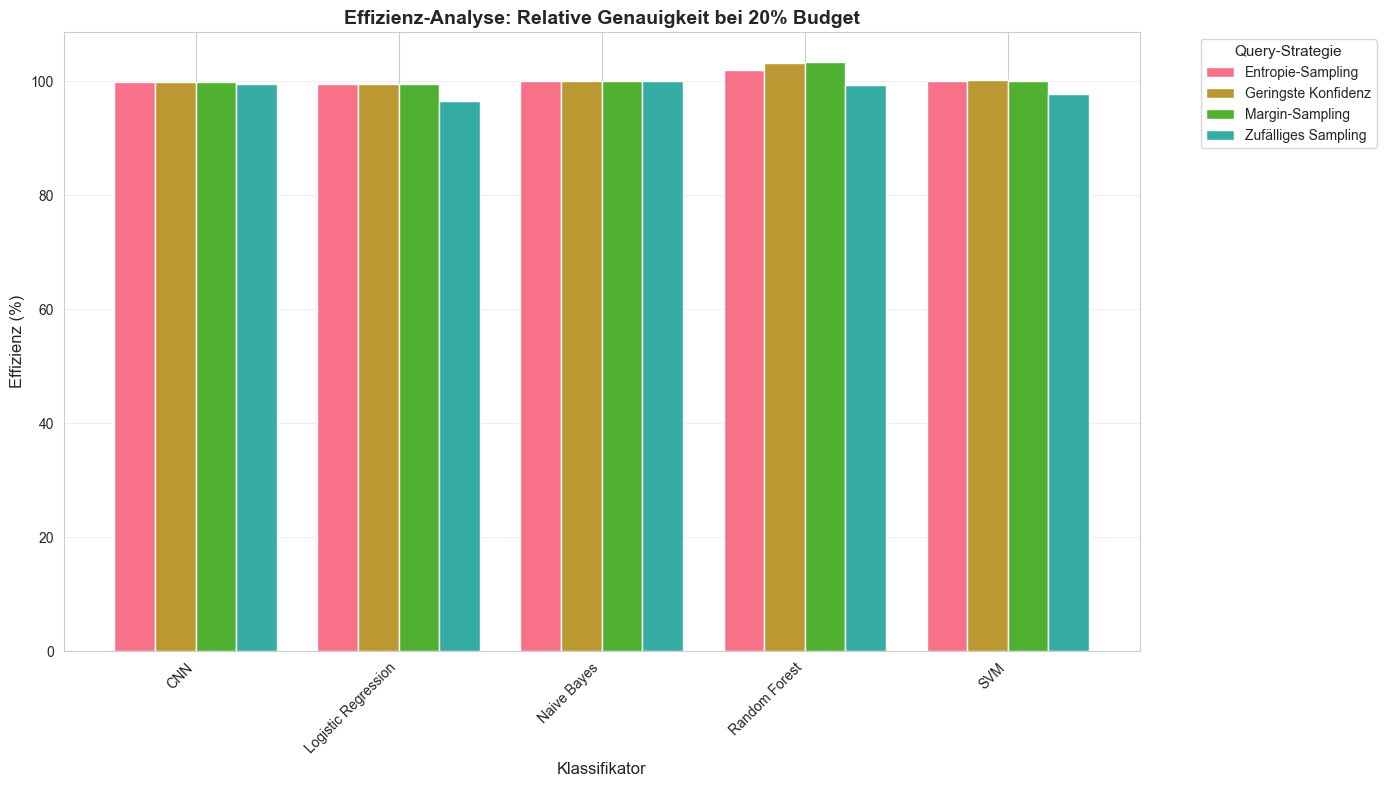

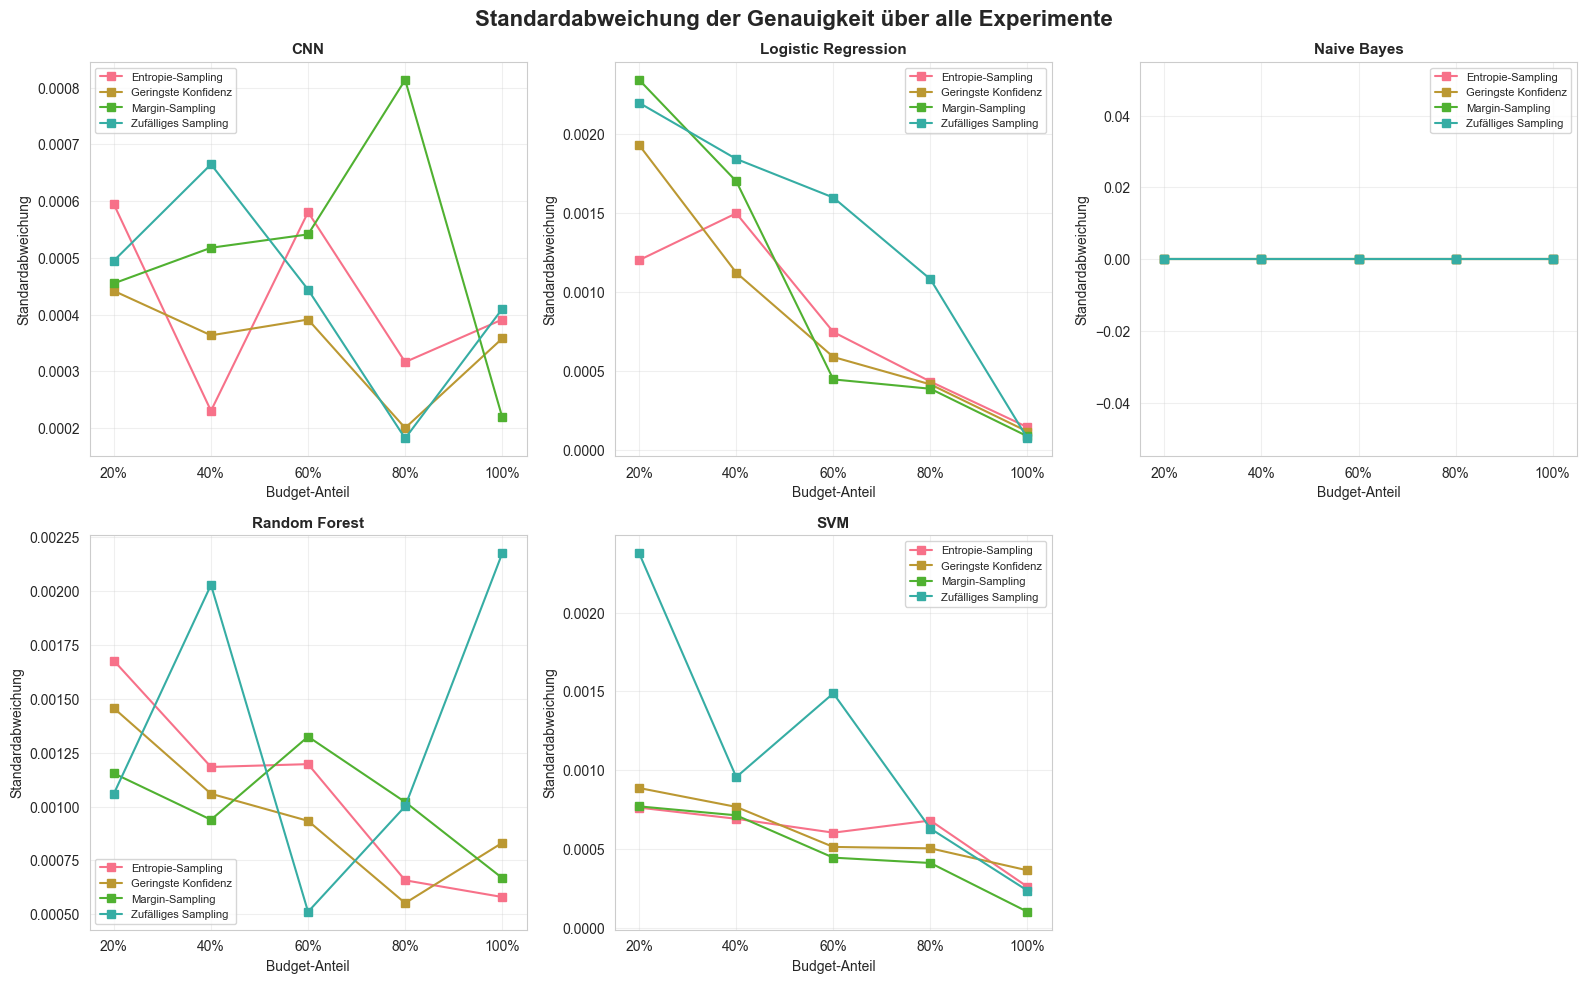

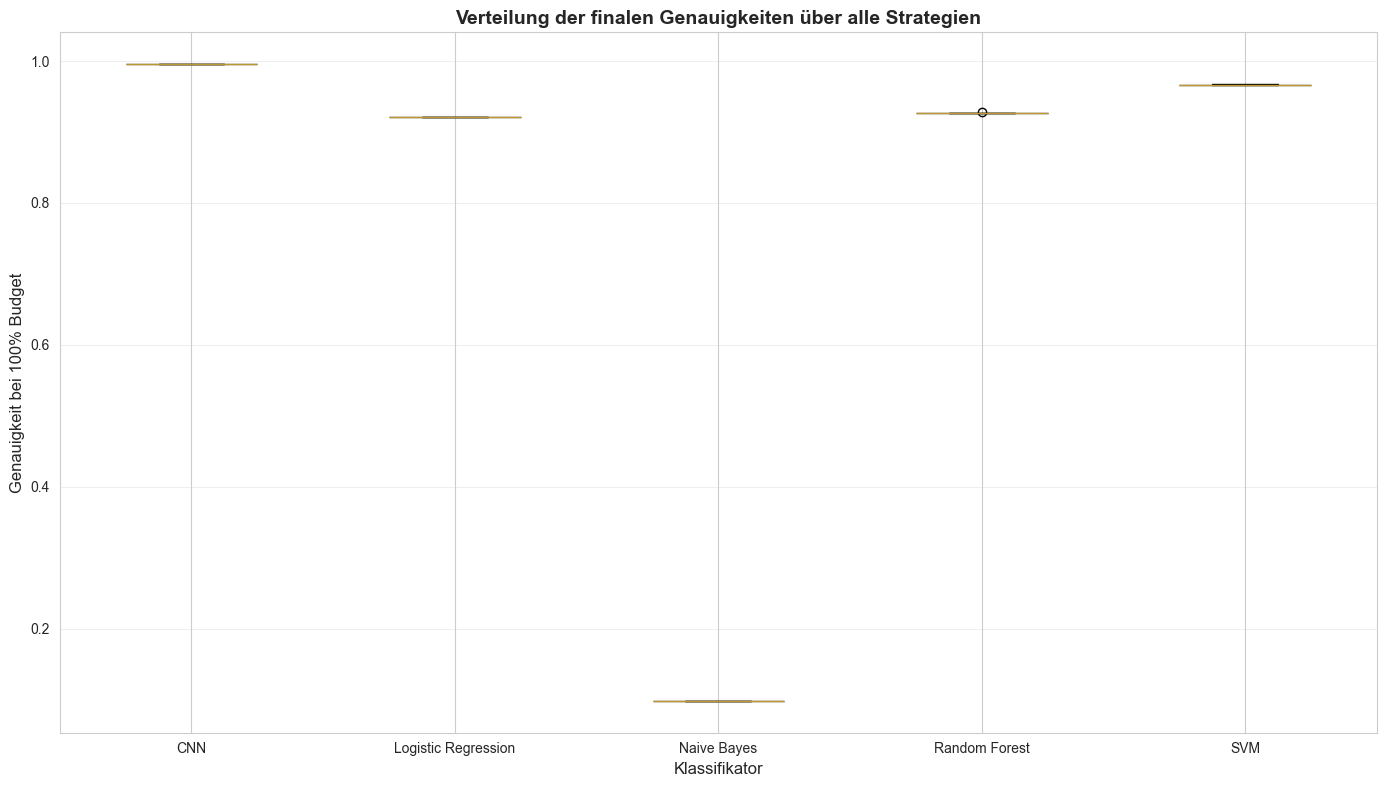

ZUSAMMENFASSUNG DER ACTIVE LEARNING EXPERIMENTE


CNN:
----------------------------------------
  Beste Strategie bei 20% Budget: Entropie-Sampling
    → Genauigkeit: 0.9944 (±0.0006)
  Beste Strategie bei 60% Budget: Margin-Sampling
    → Genauigkeit: 0.9950 (±0.0005)
  Beste Strategie bei 100% Budget: Geringste Konfidenz
    → Genauigkeit: 0.9956 (±0.0004)
  Durchschnittliche Verbesserung (20% → 100%): 0.23%

Logistic Regression:
----------------------------------------
  Beste Strategie bei 20% Budget: Entropie-Sampling
    → Genauigkeit: 0.9165 (±0.0012)
  Beste Strategie bei 60% Budget: Margin-Sampling
    → Genauigkeit: 0.9203 (±0.0004)
  Beste Strategie bei 100% Budget: Zufälliges Sampling
    → Genauigkeit: 0.9213 (±0.0001)
  Durchschnittliche Verbesserung (20% → 100%): 1.27%

Naive Bayes:
----------------------------------------
  Beste Strategie bei 20% Budget: Entropie-Sampling
    → Genauigkeit: 0.0980 (±0.0000)
  Beste Strategie bei 60% Budget: Entropie-Sampling
    → Gena

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

# Matplotlib und Seaborn Konfiguration für deutsche Beschriftungen
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
sns.set_palette("husl")

# Datenstruktur erstellen
def create_data():
    data = []
    
    # CNN Daten (Bild 1)
    cnn_data = {
        'Entropy Sampling': {0.2: (0.99436, 0.000594138), 0.4: (0.99514, 0.000230217), 
                             0.6: (0.99488, 0.000580517), 0.8: (0.9955, 0.000316228), 
                             1.0: (0.99554, 0.000391152)},
        'Least Confidence': {0.2: (0.9942, 0.000441588), 0.4: (0.99528, 0.000363318),
                            0.6: (0.99494, 0.000391152), 0.8: (0.9956, 0.0002),
                            1.0: (0.99556, 0.000357771)},
        'Margin Sampling': {0.2: (0.99428, 0.000454973), 0.4: (0.99524, 0.000517687),
                           0.6: (0.99504, 0.000541295), 0.8: (0.99558, 0.000813634),
                           1.0: (0.99534, 0.000219089)},
        'Random Sampling': {0.2: (0.9899, 0.000494975), 0.4: (0.99358, 0.000664831),
                           0.6: (0.99422, 0.000443847), 0.8: (0.99514, 0.000181659),
                           1.0: (0.99534, 0.000409878)}
    }
    
    # Logistic Regression Daten (Bild 2)
    lr_data = {
        'Entropy Sampling': {0.2: (0.91648, 0.001198749), 0.4: (0.9199, 0.001494992),
                            0.6: (0.91994, 0.00074364), 0.8: (0.9215, 0.000430116),
                            1.0: (0.9212, 0.000141421)},
        'Least Confidence': {0.2: (0.91632, 0.001926655), 0.4: (0.92154, 0.001119375),
                            0.6: (0.92026, 0.000585662), 0.8: (0.9226, 0.000412311),
                            1.0: (0.92126, 0.000114018)},
        'Margin Sampling': {0.2: (0.91638, 0.002339231), 0.4: (0.92054, 0.00169794),
                           0.6: (0.92032, 0.000443847), 0.8: (0.92254, 0.000384708),
                           1.0: (0.92122, 0.00008366)},
        'Random Sampling': {0.2: (0.88966, 0.002193855), 0.4: (0.90388, 0.001839021),
                           0.6: (0.91304, 0.001594679), 0.8: (0.91872, 0.001077961),
                           1.0: (0.9213, 0.00007071)}
    }
    
    # Naive Bayes Daten (Bild 3) - alle Werte gleich
    nb_data = {
        'Entropy Sampling': {0.2: (0.098, 0.0), 0.4: (0.098, 0.0),
                            0.6: (0.098, 0.0), 0.8: (0.098, 0.0),
                            1.0: (0.098, 0.0)},
        'Least Confidence': {0.2: (0.098, 0.0), 0.4: (0.098, 0.0),
                            0.6: (0.098, 0.0), 0.8: (0.098, 0.0),
                            1.0: (0.098, 0.0)},
        'Margin Sampling': {0.2: (0.098, 0.0), 0.4: (0.098, 0.0),
                           0.6: (0.098, 0.0), 0.8: (0.098, 0.0),
                           1.0: (0.098, 0.0)},
        'Random Sampling': {0.2: (0.098, 0.0), 0.4: (0.098, 0.0),
                           0.6: (0.098, 0.0), 0.8: (0.098, 0.0),
                           1.0: (0.098, 0.0)}
    }
    
    # Random Forest Daten (Bild 4)
    rf_data = {
        'Entropy Sampling': {0.2: (0.94502, 0.001676902), 0.4: (0.94408, 0.001184061),
                            0.6: (0.93676, 0.00119708), 0.8: (0.93026, 0.000658027),
                            1.0: (0.92692, 0.000580517)},
        'Least Confidence': {0.2: (0.95658, 0.001456709), 0.4: (0.94826, 0.001059717),
                            0.6: (0.93712, 0.000933809), 0.8: (0.9294, 0.000552268),
                            1.0: (0.92668, 0.000831865)},
        'Margin Sampling': {0.2: (0.95882, 0.001154123), 0.4: (0.94878, 0.000939149),
                           0.6: (0.9371, 0.001324764), 0.8: (0.93016, 0.001021274),
                           1.0: (0.92748, 0.000668581)},
        'Random Sampling': {0.2: (0.9208, 0.0010606), 0.4: (0.92562, 0.002029039),
                           0.6: (0.92528, 0.000511859), 0.8: (0.92554, 0.001001499),
                           1.0: (0.92686, 0.002175546)}
    }
    
    # Support Vector Machine Daten (Bild 5)
    svm_data = {
        'Entropy Sampling': {0.2: (0.9663, 0.000761577), 0.4: (0.96678, 0.000690652),
                            0.6: (0.96604, 0.000602495), 0.8: (0.96632, 0.000679706),
                            1.0: (0.96638, 0.000258844)},
        'Least Confidence': {0.2: (0.9677, 0.000886002), 0.4: (0.96798, 0.000766159),
                            0.6: (0.96678, 0.000511859), 0.8: (0.96614, 0.000502991),
                            1.0: (0.96662, 0.000363318)},
        'Margin Sampling': {0.2: (0.96778, 0.000769415), 0.4: (0.96766, 0.000712741),
                           0.6: (0.96728, 0.000443847), 0.8: (0.96676, 0.000409878),
                           1.0: (0.9672, 0.0001)},
        'Random Sampling': {0.2: (0.94398, 0.002376342), 0.4: (0.95434, 0.00095551),
                           0.6: (0.96038, 0.001487279), 0.8: (0.9633, 0.00062849),
                           1.0: (0.9662, 0.000234521)}
    }
    
    # Daten in DataFrame-Format konvertieren
    classifiers = ['CNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']
    all_data = [cnn_data, lr_data, nb_data, rf_data, svm_data]
    
    for clf_name, clf_data in zip(classifiers, all_data):
        for strategy, values in clf_data.items():
            for budget, (acc_mean, acc_std) in values.items():
                data.append({
                    'Klassifikator': clf_name,
                    'Strategie': strategy,
                    'Budget': budget,
                    'Accuracy_Mean': acc_mean,
                    'Accuracy_Std': acc_std
                })
    
    return pd.DataFrame(data)

# Hauptdaten laden
df = create_data()

# Deutsche Übersetzungen für Strategien
strategy_translation = {
    'Entropy Sampling': 'Entropie-Sampling',
    'Least Confidence': 'Geringste Konfidenz',
    'Margin Sampling': 'Margin-Sampling',
    'Random Sampling': 'Zufälliges Sampling'
}
df['Strategie_DE'] = df['Strategie'].map(strategy_translation)

# PDF für alle Plots erstellen
pdf_pages = PdfPages('active_learning_results.pdf')

# Plot 1: Übersicht aller Klassifikatoren mit dynamischer Skalierung
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Active Learning Ergebnisse: Genauigkeit nach Budget und Strategie', 
             fontsize=16, fontweight='bold', y=1.02)

classifiers = df['Klassifikator'].unique()
colors = sns.color_palette("husl", 4)

for idx, clf in enumerate(classifiers):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    clf_data = df[df['Klassifikator'] == clf]
    
    # Dynamische Y-Achsen-Skalierung
    y_min = clf_data['Accuracy_Mean'].min() - 2 * clf_data['Accuracy_Std'].max()
    y_max = clf_data['Accuracy_Mean'].max() + 2 * clf_data['Accuracy_Std'].max()
    y_range = y_max - y_min
    
    if y_range < 0.05:  # Kleine Unterschiede - zoom in
        y_padding = 0.005
    else:
        y_padding = y_range * 0.1
    
    for i, strategy in enumerate(df['Strategie_DE'].unique()):
        strategy_data = clf_data[clf_data['Strategie_DE'] == strategy]
        strategy_data = strategy_data.sort_values('Budget')
        
        ax.errorbar(strategy_data['Budget'], 
                   strategy_data['Accuracy_Mean'],
                   yerr=strategy_data['Accuracy_Std'],
                   label=strategy, 
                   marker='o', 
                   capsize=5, 
                   capthick=1.5,
                   color=colors[i],
                   linewidth=2,
                   markersize=8)
    
    ax.set_xlabel('Budget-Anteil', fontsize=11)
    ax.set_ylabel('Genauigkeit', fontsize=11)
    ax.set_title(f'{clf}', fontsize=13, fontweight='bold')
    ax.legend(loc='best', framealpha=0.9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.05)
    ax.set_ylim(y_min - y_padding, y_max + y_padding)
    
    # X-Achsen-Ticks
    ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels(['20%', '40%', '60%', '80%', '100%'])

# Leere Subplot entfernen
if len(classifiers) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 2: Vergleich der Strategien über alle Klassifikatoren
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Vergleich der Query-Strategien über alle Klassifikatoren', 
             fontsize=16, fontweight='bold')

strategies = df['Strategie_DE'].unique()
clf_colors = sns.color_palette("Set2", 5)

for idx, strategy in enumerate(strategies):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    for i, clf in enumerate(classifiers):
        clf_data = df[(df['Klassifikator'] == clf) & (df['Strategie_DE'] == strategy)]
        clf_data = clf_data.sort_values('Budget')
        
        ax.plot(clf_data['Budget'], 
               clf_data['Accuracy_Mean'],
               label=clf, 
               marker='o',
               color=clf_colors[i],
               linewidth=2,
               markersize=7)
    
    ax.set_xlabel('Budget-Anteil', fontsize=11)
    ax.set_ylabel('Genauigkeit', fontsize=11)
    ax.set_title(f'{strategy}', fontsize=13, fontweight='bold')
    ax.legend(loc='best', framealpha=0.9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.05)
    ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels(['20%', '40%', '60%', '80%', '100%'])

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 3: Heatmap der finalen Genauigkeiten (100% Budget)
fig, ax = plt.subplots(figsize=(12, 8))
final_results = df[df['Budget'] == 1.0].pivot(
    index='Klassifikator', 
    columns='Strategie_DE', 
    values='Accuracy_Mean'
)

sns.heatmap(final_results, 
            annot=True, 
            fmt='.4f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Genauigkeit'},
            ax=ax,
            linewidths=1,
            linecolor='gray')

ax.set_title('Finale Genauigkeiten bei 100% Budget', fontsize=14, fontweight='bold')
ax.set_xlabel('Query-Strategie', fontsize=12)
ax.set_ylabel('Klassifikator', fontsize=12)
plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 4: Effizienz-Analyse (Genauigkeit bei 20% vs 100% Budget)
fig, ax = plt.subplots(figsize=(14, 8))

efficiency_data = []
for clf in classifiers:
    for strategy in df['Strategie_DE'].unique():
        acc_20 = df[(df['Klassifikator'] == clf) & 
                   (df['Strategie_DE'] == strategy) & 
                   (df['Budget'] == 0.2)]['Accuracy_Mean'].values[0]
        acc_100 = df[(df['Klassifikator'] == clf) & 
                    (df['Strategie_DE'] == strategy) & 
                    (df['Budget'] == 1.0)]['Accuracy_Mean'].values[0]
        efficiency = (acc_20 / acc_100) * 100 if acc_100 > 0 else 0
        efficiency_data.append({
            'Klassifikator': clf,
            'Strategie': strategy,
            'Effizienz': efficiency
        })

eff_df = pd.DataFrame(efficiency_data)
pivot_eff = eff_df.pivot(index='Klassifikator', columns='Strategie', values='Effizienz')

pivot_eff.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Effizienz-Analyse: Relative Genauigkeit bei 20% Budget', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Klassifikator', fontsize=12)
ax.set_ylabel('Effizienz (%)', fontsize=12)
ax.legend(title='Query-Strategie', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 5: Standardabweichungs-Analyse
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Standardabweichung der Genauigkeit über alle Experimente', 
             fontsize=16, fontweight='bold')

for idx, clf in enumerate(classifiers):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    clf_data = df[df['Klassifikator'] == clf]
    
    for strategy in df['Strategie_DE'].unique():
        strategy_data = clf_data[clf_data['Strategie_DE'] == strategy]
        strategy_data = strategy_data.sort_values('Budget')
        
        ax.plot(strategy_data['Budget'], 
               strategy_data['Accuracy_Std'],
               label=strategy, 
               marker='s',
               linewidth=1.5,
               markersize=6)
    
    ax.set_xlabel('Budget-Anteil', fontsize=10)
    ax.set_ylabel('Standardabweichung', fontsize=10)
    ax.set_title(f'{clf}', fontsize=11, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.15, 1.05)
    ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels(['20%', '40%', '60%', '80%', '100%'])

# Leere Subplots entfernen
for idx in range(len(classifiers), 6):
    row = idx // 3
    col = idx % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 6: Box-Plot für finale Genauigkeiten
fig, ax = plt.subplots(figsize=(14, 8))

final_data = df[df['Budget'] == 1.0]
box_data = []
labels = []

for clf in classifiers:
    clf_final = final_data[final_data['Klassifikator'] == clf]['Accuracy_Mean'].values
    box_data.append(clf_final)
    labels.append(clf)

bp = ax.boxplot(box_data, labels=labels, patch_artist=True)
for patch, color in zip(bp['boxes'], clf_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Verteilung der finalen Genauigkeiten über alle Strategien', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Klassifikator', fontsize=12)
ax.set_ylabel('Genauigkeit bei 100% Budget', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# PDF schließen
pdf_pages.close()

# Zusammenfassende Statistiken ausgeben
print("=" * 80)
print("ZUSAMMENFASSUNG DER ACTIVE LEARNING EXPERIMENTE")
print("=" * 80)
print()

for clf in classifiers:
    print(f"\n{clf}:")
    print("-" * 40)
    clf_data = df[df['Klassifikator'] == clf]
    
    # Beste Strategie bei verschiedenen Budgets
    for budget in [0.2, 0.6, 1.0]:
        budget_data = clf_data[clf_data['Budget'] == budget]
        best = budget_data.loc[budget_data['Accuracy_Mean'].idxmax()]
        print(f"  Beste Strategie bei {int(budget*100)}% Budget: {best['Strategie_DE']}")
        print(f"    → Genauigkeit: {best['Accuracy_Mean']:.4f} (±{best['Accuracy_Std']:.4f})")
    
    # Durchschnittliche Verbesserung von 20% zu 100% Budget
    acc_20 = clf_data[clf_data['Budget'] == 0.2]['Accuracy_Mean'].mean()
    acc_100 = clf_data[clf_data['Budget'] == 1.0]['Accuracy_Mean'].mean()
    improvement = ((acc_100 - acc_20) / acc_20) * 100 if acc_20 > 0 else 0
    print(f"  Durchschnittliche Verbesserung (20% → 100%): {improvement:.2f}%")

print("\n" + "=" * 80)
print("Plots wurden erfolgreich als 'active_learning_results.pdf' gespeichert!")
print("=" * 80)